# **Bank customer Exit Clasification Using Artificial Neural Network(ANN)**

<img src="1.png" alt="alternative_text" width="500" height="500" >

#### In This Project we will used the bank customer churn dataset  and training the Artificial Neural Network(ANN)

## **Following are The Project Overview:**
<h3>Exploratry Data Anlysis(EDA)</h3>
<B>
<ol>
  <li>Importing libries</li>
  <li>Load Data</li>
  <li>Collecting Basic Information About The DataSet</li>
  <li>Removeing Duplicate Rows</li>
  <li>Detecting the Outliers and Manage them</li>
  <li>Finding The Missing Value and Manage them</li>
</ol>
 </B>
    
<h3>Apply Deep Learing Tecnique</h3>
<B>
<ol>
  <li>Importing libries</li>
  <li>Setting Up Hyper-Parameter</li>
  <li>Buliding Artificial Neural Network(ANN)</li>
  <li>Training Model</li>
  <li>Predict From the Model </li>
  <li>Finding accuracy of Your Modle</li>
  <li>Report</li>
</ol>
</B>

# **What is Our DataSet?**

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

**1. Customer ID:**     A unique identifier for each customer<br>
**2. Surname:**         The customer's surname or last name<br>
**3. Credit Score:** A numerical value representing the customer's credit score<br>
**4. Geography:** The country where the customer resides (France, Spain or Germany)<br>
**5. Gender:** The customer's gender (Male or Female)<br>
**6. Age:** The customer's age.<br>
**7. Tenure:** The number of years the customer has been with the bank<br>
**8. Balance:** The customer's account balance<br>
**9. NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)<br>
**10. HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)<br>
**11. IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)<br>
**12. EstimatedSalary:** The estimated salary of the customer<br>
**13. Exited:** Whether the customer has churned (1 = yes, 0 = no)

================================================================================================================

# **Exploratry Data Anlysis(EDA)**

### **Importing libries**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

### **Load Data**

In [12]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


### **Collecting Basic Information About The DataSet**

In [14]:
data.shape

(10002, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### **Removeing Duplicate Rows**

In [17]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999      True
10000    False
10001     True
Length: 10002, dtype: bool

In [18]:
data.shape

(10002, 14)

In [19]:
list=data[data.duplicated()].index
list

Index([9999, 10001], dtype='int64')

In [20]:
type(list)

pandas.core.indexes.base.Index

In [21]:
list=list.to_list()
list

[9999, 10001]

In [22]:
data.drop(list,axis=0,inplace=True)

In [23]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [24]:
data["Exited"]=data["Exited"].astype("category")
data["Exited"]

0        1
1        0
2        1
3        0
4        0
        ..
9995     0
9996     0
9997     1
9998     1
10000    0
Name: Exited, Length: 10000, dtype: category
Categories (2, int64): [0, 1]

In [25]:
exited_counts = data['Exited'].value_counts()
print(exited_counts)


Exited
0    7963
1    2037
Name: count, dtype: int64


In [26]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [27]:
data.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [28]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


### **Encoded catagorical Features**

In [30]:

data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)

In [31]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,False,False,True
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,False,False,True
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,False,False,False
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,True,False,True


In [32]:
data.replace({False: 0, True: 1}, inplace=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21352\2918697156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({False: 0, True: 1}, inplace=True)


In [33]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,NaN,1.0,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1.0,0.0,96270.64,0,0,0,1
9996,516,35.0,10,57369.61,1,1.0,1.0,101699.77,0,0,0,1
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1,0,0,0
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1,0,1


In [34]:
data["Geography_Germany"].value_counts()

Geography_Germany
0    7491
1    2509
Name: count, dtype: int64

In [35]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [36]:
data=data.dropna()
data.shape

(9997, 12)

### **Now Defining the Input and Target features**

In [38]:
X=data.drop(columns="Exited")
Y=data["Exited"]

In [39]:
X.shape,Y.shape

((9997, 11), (9997,))

In [40]:
Y=Y.astype("int")
Y.dtype

dtype('int32')

In [41]:
data["Exited"].value_counts()

Exited
0    7960
1    2037
Name: count, dtype: int64

### **Now Do Train Test Spliting**

In [43]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    random_state=101,  # Seed for reproducibility
    test_size=0.20,    # 20% of the data for testing
    stratify=Y         # Stratify based on target variable Y
)

# Print shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7997, 11)
X_test shape: (2000, 11)
y_train shape: (7997,)
y_test shape: (2000,)


In [44]:
X_train.shape

(7997, 11)

In [45]:
y_train.shape

(7997,)

In [46]:
pd.Series(y_train).value_counts()

Exited
0    6368
1    1629
Name: count, dtype: int64

In [47]:
# X_train=X_train.dropna()
# X_train.shape

# **Apply the Balancing technique To Balanced The Dataset**

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(random_state=42)


In [51]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [172]:
pd.Series(y_resampled).value_counts()

Exited
0    6368
1    6368
Name: count, dtype: int64

In [170]:
# Print shapes of the resulting datasets
print("X_train shape:", X_resampled.shape)
print("Y_train shape:", y_resampled.shape)

X_train shape: (12736, 11)
Y_train shape: (12736,)


### **Now Scaled the Input data**

In [176]:
from sklearn.preprocessing import StandardScaler

In [178]:
Standar_Scaler=StandardScaler()

In [180]:
Scaled_x_train=Standar_Scaler.fit_transform(X_resampled)
Scaled_X_test=Standar_Scaler.transform(X_test)


In [182]:
Scaled_x_train.shape

(12736, 11)

In [184]:
Scaled_X_test.shape

(2000, 11)

In [186]:
Scaled_x_train=pd.DataFrame(Scaled_x_train,columns=X_train.columns)
Scaled_x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.986962,-0.129176,1.169032,-0.074258,-0.737310,-1.648332,1.159783,-1.408114,1.725907,-0.454694,-0.834460
1,1.027534,-0.622291,0.066131,0.897594,-0.737310,-1.648332,-0.973504,-0.276489,1.725907,-0.454694,1.198379
2,1.550858,0.068070,-1.404403,0.059439,-0.737310,0.692547,-0.973504,1.702601,1.725907,-0.454694,1.198379
3,-0.607853,-1.016783,0.801399,0.696114,-0.737310,0.692547,-0.973504,-0.249153,1.725907,-0.454694,1.198379
4,-0.117237,-1.411275,-1.404403,-1.350804,0.993316,0.692547,-0.973504,-0.158419,-0.579405,-0.454694,1.198379
...,...,...,...,...,...,...,...,...,...,...,...
12731,1.518151,-1.077135,-0.301502,0.417458,-0.737310,0.475929,-0.776097,-1.420882,1.725907,-0.454694,-0.834460
12732,-0.051822,-0.028566,1.169032,-0.122022,-0.737310,0.692547,-0.712216,-1.282868,-0.579405,2.199283,-0.834460
12733,-0.564243,0.402140,-1.036770,0.720979,-0.737310,0.692547,1.159783,-1.213123,1.725907,-0.454694,-0.834460
12734,0.079009,-0.739844,-0.301502,0.842067,-0.737310,0.692547,1.159783,-0.905744,-0.579405,-0.454694,-0.834460


In [188]:
Scaled_x_train.describe().round(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,12736.0,12736.0,12736.0,12736.0,12736.0,12736.0,12736.0,12736.0,12736.0,12736.0,12736.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-3.2,-2.3,-1.8,-1.4,-0.7,-1.6,-1.0,-1.7,-0.6,-0.5,-0.8
25%,-0.7,-0.7,-0.7,-1.4,-0.7,-1.2,-1.0,-0.9,-0.6,-0.5,-0.8
50%,0.0,-0.1,0.1,0.3,-0.7,0.7,-0.5,0.0,-0.6,-0.5,-0.8
75%,0.7,0.6,0.8,0.8,1.0,0.7,1.2,0.9,1.7,-0.5,1.2
max,2.2,5.0,1.9,2.3,4.5,0.7,1.2,1.7,1.7,2.2,1.2


In [190]:
Scaled_X_test=pd.DataFrame(Scaled_X_test,columns=X_test.columns)
Scaled_X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-1.272911,-0.425045,0.801399,0.651120,-0.737310,0.692547,-0.973504,0.820568,-0.579405,-0.454694,1.198379
1,0.656846,-0.030553,0.066131,-1.350804,-0.737310,-1.648332,1.159783,0.985664,-0.579405,2.199283,-0.834460
2,0.089912,-0.720914,0.433765,-0.367090,-0.737310,0.692547,-0.973504,-1.503518,-0.579405,2.199283,-0.834460
3,0.460600,-0.918160,-1.036770,-0.100769,-0.737310,-1.648332,1.159783,0.895456,-0.579405,2.199283,1.198379
4,-1.251106,-0.326422,-1.404403,0.871839,0.993316,-1.648332,1.159783,0.915193,-0.579405,2.199283,1.198379
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.967639,1.054299,-1.036770,-1.350804,-0.737310,0.692547,-0.973504,0.498341,-0.579405,-0.454694,1.198379
1996,-0.520633,-1.411275,0.433765,-1.350804,0.993316,0.692547,1.159783,1.247294,-0.579405,2.199283,-0.834460
1997,0.744067,-1.214029,1.169032,-1.350804,0.993316,-1.648332,-0.973504,-0.379083,-0.579405,2.199283,-0.834460
1998,-0.640561,0.857053,-0.301502,-1.350804,0.993316,-1.648332,1.159783,1.422194,-0.579405,-0.454694,-0.834460


In [192]:
Scaled_X_test.describe().round(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,0.1,-0.2,0.1,-0.1,0.2,-0.0,0.1,0.0,-0.0,0.2,0.3
std,1.0,1.0,1.1,1.0,1.0,1.1,1.1,1.0,1.0,1.2,1.0
min,-3.2,-2.3,-1.8,-1.4,-0.7,-1.6,-1.0,-1.7,-0.6,-0.5,-0.8
25%,-0.7,-0.9,-1.0,-1.4,-0.7,-1.6,-1.0,-0.9,-0.6,-0.5,-0.8
50%,0.1,-0.4,0.1,0.2,-0.7,0.7,1.2,-0.0,-0.6,-0.5,1.2
75%,0.8,0.3,1.2,0.8,1.0,0.7,1.2,0.9,-0.6,2.2,1.2
max,2.2,5.0,1.9,2.8,4.5,0.7,1.2,1.7,1.7,2.2,1.2


### **Now That this The final Data Which were Ready for the Training Model**

In [196]:
# Print shapes of the resulting datasets
print("X_train shape:", X_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_resampled.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12736, 11)
X_test shape: (2000, 11)
y_train shape: (12736,)
y_test shape: (2000,)


# **Apply Deep Learing Tecnique**

### **Importing libries**

In [198]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### **Setting Up Hyper-Parameter**

In [200]:
# Number of features in the input data
input_size = 11

# Number of samples processed in each training iteration
batch_size = 200

# Number of neurons in the first hidden layer
hidden_layer1 = 100

# Number of neurons in the second hidden layer
hidden_layer2 = 50


# Number of neurons in the third hidden layer
hidden_layer3 = 20

# Number of neurons in the output layer (typically for binary classification)
output_layer = 1


### **Buliding Artificial Neural Network(ANN)**


<img src="https://blogs.rstudio.com/ai/posts/2018-01-11-keras-customer-churn/images/Artificial-Neural-Network-Architecture.jpg" alt="alternative_text" width="500" height="500" >

In [212]:
def get_model(input_size, hidden_layer1, hidden_layer2, output_layer,hidden_layer3):
    # Initialize the Sequential model
    model = Sequential()

    # Add the first hidden layer
    model.add(Dense(hidden_layer1, input_dim=input_size, activation="relu"))

    # Add the second hidden layer
    model.add(Dense(hidden_layer2, activation="relu"))

    # Add the third hidden layer
    model.add(Dense(hidden_layer3, activation="relu"))

    # Add the output layer
    model.add(Dense(output_layer, activation="sigmoid"))  # Use 'sigmoid' for binary classification

    return model




In [214]:
ANN_Model2=get_model(input_size, hidden_layer1, hidden_layer2, output_layer,hidden_layer3)

D:\setups\ancondaInstall\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [216]:
ANN_Model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,291 (28.48 KB)

 Trainable params: 7,291 (28.48 KB)

 Non-trainable params: 0 (0.00 B)

In [218]:
ANN_Model2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

### **Training Model**


<img src="https://elitedatascience.com/wp-content/uploads/2018/05/Model-Training-Feature.jpg" alt="alternative_text" width="500" height="500" >

In [220]:
from time import time

# Record the start time
start_time = time()

# Train the model
History=ANN_Model2.fit(
    Scaled_x_train,   # Training features (scaled data)
    y_resampled,          # Training labels
    batch_size=batch_size,   # Number of samples per gradient update
    epochs=30,        # Number of times the entire dataset is passed through the model
    verbose=1,        # Verbosity mode (1 means progress bar will be shown)
    validation_split=0.2  # Fraction of training data to be used for validation
)

# Record the end time
end_time = time()

# Print the total execution time
print(f"Total Execution Time is: {end_time - start_time} seconds")


Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6412 - loss: 0.6112 - val_accuracy: 0.7104 - val_loss: 0.6048
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7745 - loss: 0.4742 - val_accuracy: 0.7896 - val_loss: 0.4653
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8037 - loss: 0.4257 - val_accuracy: 0.7582 - val_loss: 0.5151
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8210 - loss: 0.3954 - val_accuracy: 0.7465 - val_loss: 0.5292
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8335 - loss: 0.3774 - val_accuracy: 0.8026 - val_loss: 0.4421
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.3722 - val_accuracy: 0.7857 - val_loss: 0.4669
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.3566 - val_accuracy: 0.8293 - val_loss: 0.3824
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8365 - loss: 0.3645 - val_accuracy: 0.7826 - val_loss

In [222]:
History.history

{'accuracy': [0.7033765316009521,
  0.7847467660903931,
  0.8087946772575378,
  0.8205732107162476,
  0.8256772756576538,
  0.8312720656394958,
  0.8345111608505249,
  0.8371613621711731,
  0.8414801955223083,
  0.8431488275527954,
  0.8488417863845825,
  0.8494306802749634,
  0.8535531759262085,
  0.8578720092773438,
  0.8571849465370178,
  0.8601295351982117,
  0.8612092733383179,
  0.8631723523139954,
  0.8644483685493469,
  0.8656262159347534,
  0.866902232170105,
  0.8713191747665405,
  0.8707302808761597,
  0.8724970817565918,
  0.8689634799957275,
  0.8755398392677307,
  0.8759324550628662,
  0.8781900405883789,
  0.878288209438324,
  0.8797605037689209],
 'loss': [0.558694064617157,
  0.45972225069999695,
  0.4205308258533478,
  0.39756667613983154,
  0.38661184906959534,
  0.3756723701953888,
  0.3686625063419342,
  0.3655796945095062,
  0.3548336923122406,
  0.35198110342025757,
  0.34416311979293823,
  0.34186726808547974,
  0.3349120318889618,
  0.33010217547416687,
  0.326

# **Model Training Graphical Visualization**

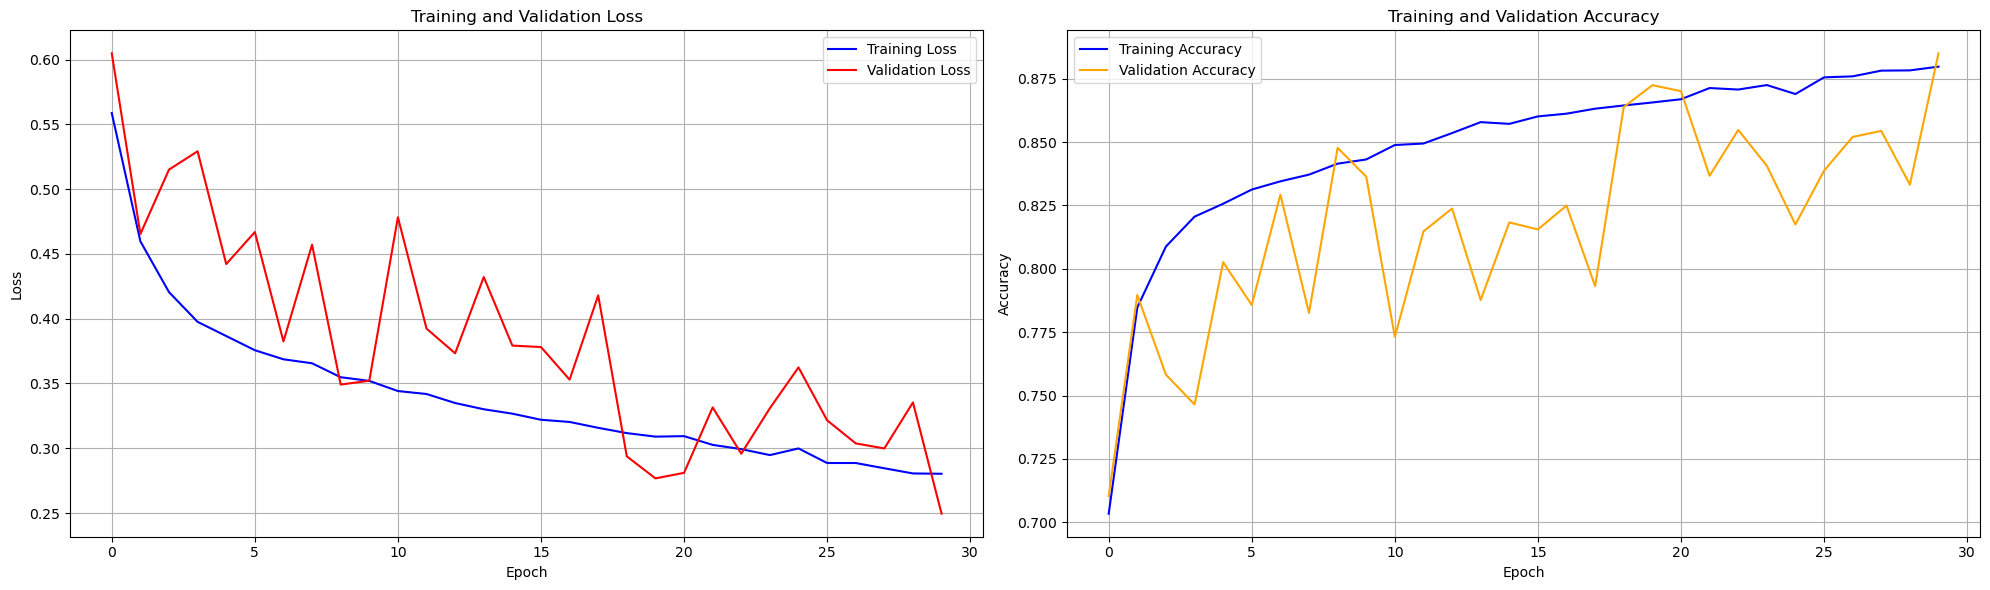

In [224]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot training and validation accuracy
    ax2.plot(accuracy, label='Training Accuracy', color='blue')
    ax2.plot(val_accuracy, label='Validation Accuracy', color='orange')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
plot_training_history(History)


# **Predicting from The Model** 



<img src="2.png" alt="alternative_text" width="500" height="500" >

In [226]:
prdication =ANN_Model2.predict(Scaled_X_test)
prdication

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.11313277],
       [0.50580555],
       [0.41884258],
       ...,
       [0.0200194 ],
       [0.70726514],
       [0.9912486 ]], dtype=float32)

In [228]:
prdication=np.where(prdication>0.5,1,0)

In [230]:
prdication

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

# **Comparison Side by side**

In [234]:
p=pd.DataFrame(prdication)
p

,0
0,0
1,1
2,0
3,0
4,0
...,...
1995,1
1996,0
1997,0
1998,1


In [236]:
p.rename(columns={0:"Predication Values"},inplace=True)

In [238]:
yy=pd.DataFrame(y_test).reset_index()
yy.drop(columns="index",inplace=True,axis=1)

In [240]:
yy.rename(columns={"Exited":"Actual values"},inplace=True)

In [242]:
yy

,Actual values
0,0
1,0
2,1
3,0
4,0
...,...
1995,1
1996,0
1997,0
1998,0


In [244]:
Camparsion=pd.concat([yy,p],axis=1)
Camparsion

,Actual values,Predication Values
0,0,0
1,0,1
2,1,0
3,0,0
4,0,0
...,...,...
1995,1,1
1996,0,0
1997,0,0
1998,0,1


### **Model Evaluation**

In [246]:
Test_accuracy=accuracy_score(y_test,prdication)
print(f"Test accuracy : {round(Test_accuracy*100,1)}%")

Test accuracy : 81.8%


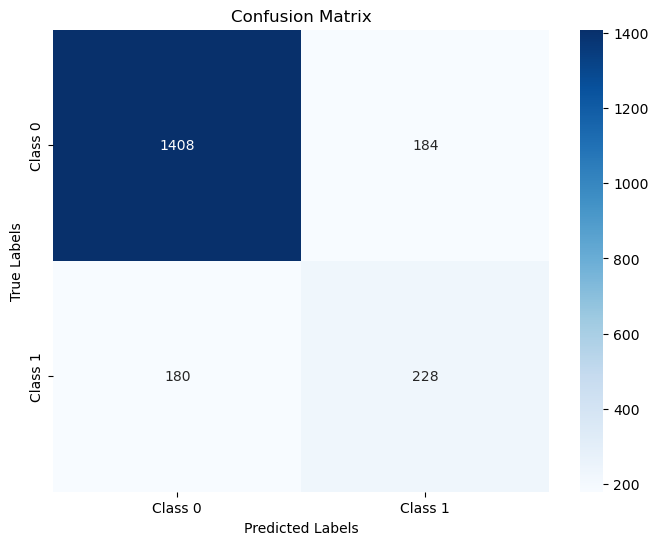

In [248]:

# Compute confusion matrix
cm = confusion_matrix(y_test, prdication)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()